# Publication-Grade Plot

In [47]:
import folium
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline
mpl.style.use(['ggplot'])
plt.style.use('fivethirtyeight')

## Reading the Data

In [48]:

london_crime_data=pd.read_csv('/Users/apple/Downloads/london_crime_by_lsoa.csv')


In [49]:
london_crime_data.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [50]:
print('data shape:' , london_crime_data.shape)
print('data columns:' , london_crime_data.columns)
print('data index:', london_crime_data.index)

data shape: (13490604, 7)
data columns: Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')
data index: RangeIndex(start=0, stop=13490604, step=1)


In [51]:
london_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [52]:
london_crime_data.isnull().any()

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

In [53]:
# Menghapus kolom lsoa_code
london_crime_data.drop(['lsoa_code'], axis=1, inplace=True)
london_crime_data.head(3)

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5


In [54]:
london_crime_data.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [56]:
london_crime_data[london_crime_data['major_category'] == 'Theft and Handling']

,borough,major_category,minor_category,value,year,month
5,Ealing,Theft and Handling,Other Theft,0,2012,5
9,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
10,Haringey,Theft and Handling,Motor Vehicle Interference & Tampering,0,2013,12
14,Hillingdon,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2016,2
16,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
...,...,...,...,...,...,...
13490590,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490593,Wandsworth,Theft and Handling,Handling Stolen Goods,0,2014,12
13490596,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490597,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10


## Number of Crimes in London by Year

### Sum of Crimes Vary by Year

In [265]:
df_year = london_crime_data.groupby('year').sum()[['value']]
df_year

/var/folders/xy/xy312wfd7rl3ln2c6qntrhdr0000gn/T/ipykernel_16836/3475557103.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year = london_crime_data.groupby('year').sum()[['value']]


,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


- ### Line Plot

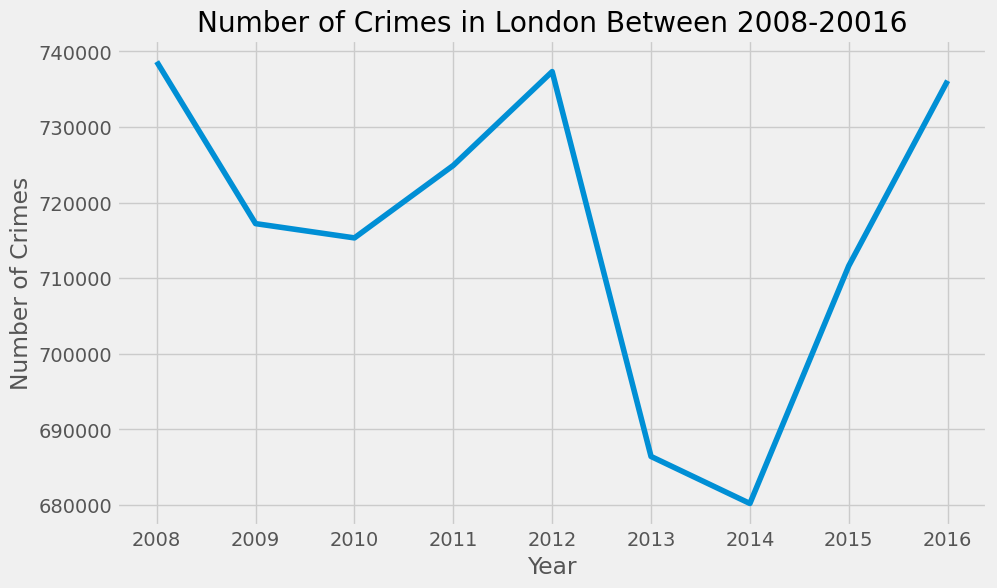

In [269]:
ax = df_year.plot(kind='line', figsize=(10,6))

ax.set_title('Number of Crimes in London Between 2008-20016')
ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Year')
ax.legend().set_visible(False)

plt.show() 

- ### Scatter Plot

In [271]:
df_year.reset_index('year', inplace=True)
df_year

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


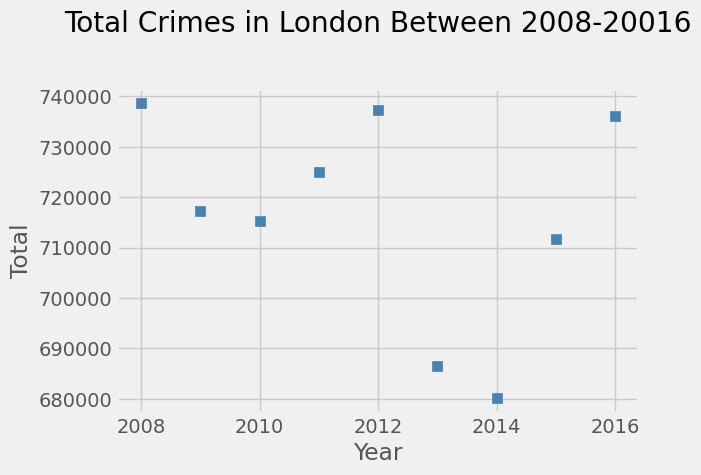

In [272]:
df_year.plot(kind='scatter', x='year', y='value', figsize=(6,4), color = 'steelblue', marker= 's', s=50)
plt.title('Total Crimes in London Between 2008-20016', y=1.15)
plt.ylabel('Total')
plt.xlabel('Year')

plt.show()

Berdasarkan gambar line dan scatter plot diatas, dapat diketahui bahwa:
 - Total angka kejahatan tertinggi di London berada pada tahun 2008. 
 - Total angka kejahatan terendah di London berada pada tahun 2014
 - Total angka kejahatan di London mengalami lonjakan dari tahun 2015
 

## High Level Categorization of Crime in London

### Number of Major Category of Crimes in London

In [140]:
df_major = london_crime_data.groupby('major_category').sum()[['value']]
df_major.sort_values(by='value', ascending=False, inplace=True)
df_major

/var/folders/xy/xy312wfd7rl3ln2c6qntrhdr0000gn/T/ipykernel_16836/1900915325.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_major = london_crime_data.groupby('major_category').sum()[['value']]


,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765
Robbery,258873
Other Notifiable Offences,106349
Fraud or Forgery,5325
Sexual Offences,1273


- #### Area Plot

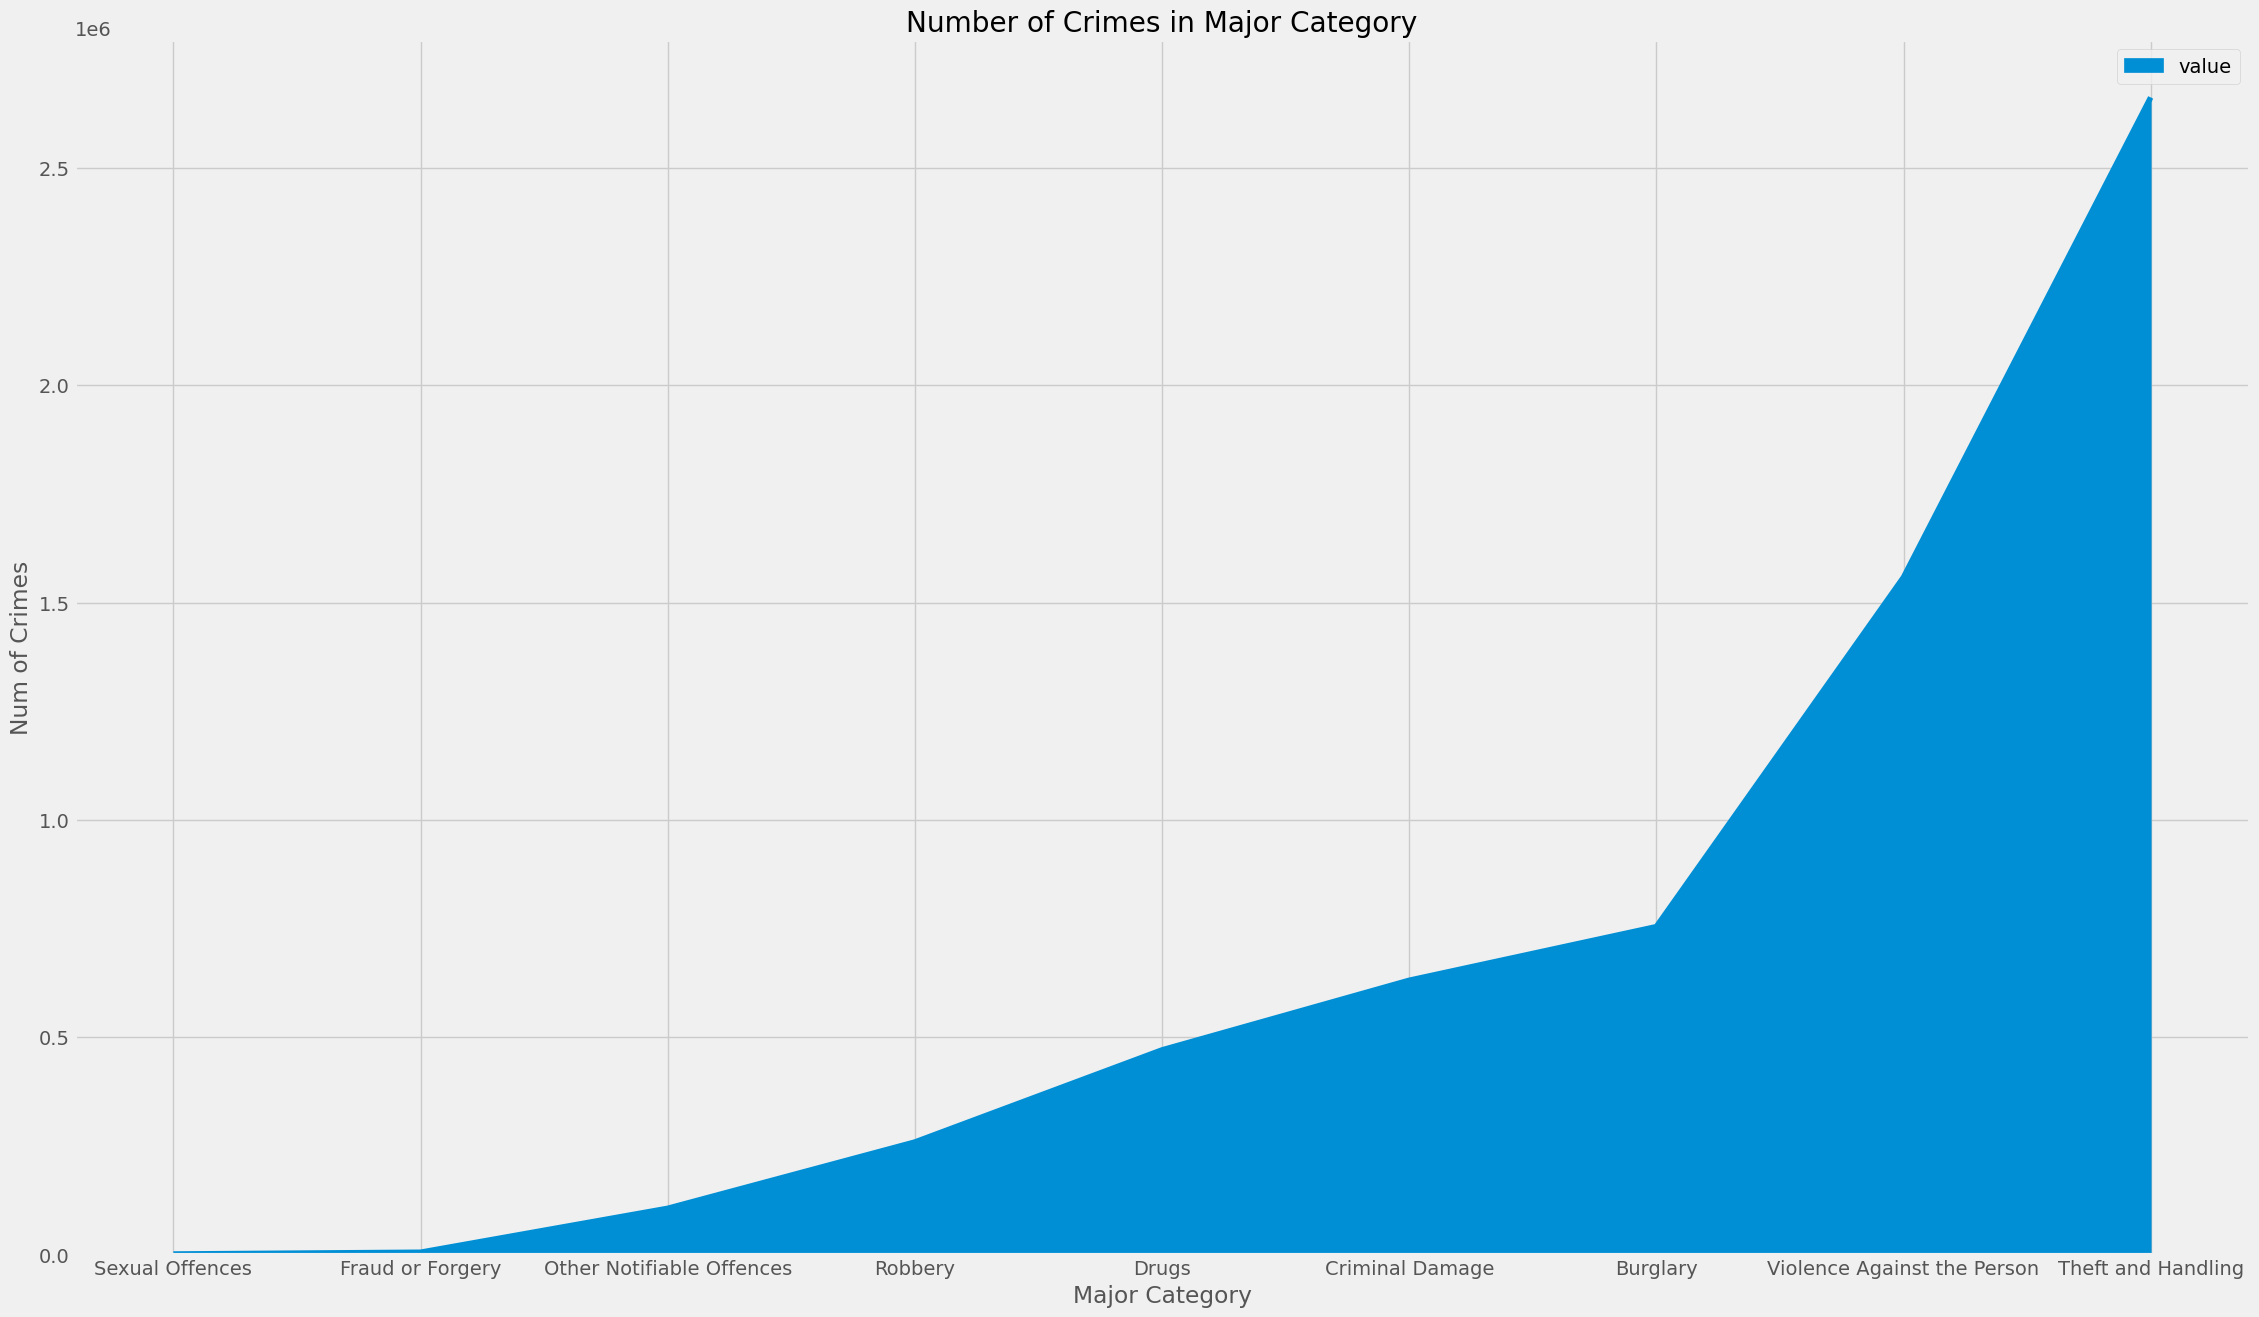

In [275]:
df_major.plot(kind='area', stacked=True, figsize=(25,15))

plt.title('Number of Major Category of Crimes')
plt.ylabel('Num of Crimes')
plt.xlabel('Major Category')


plt.show()

- #### Bar Plot

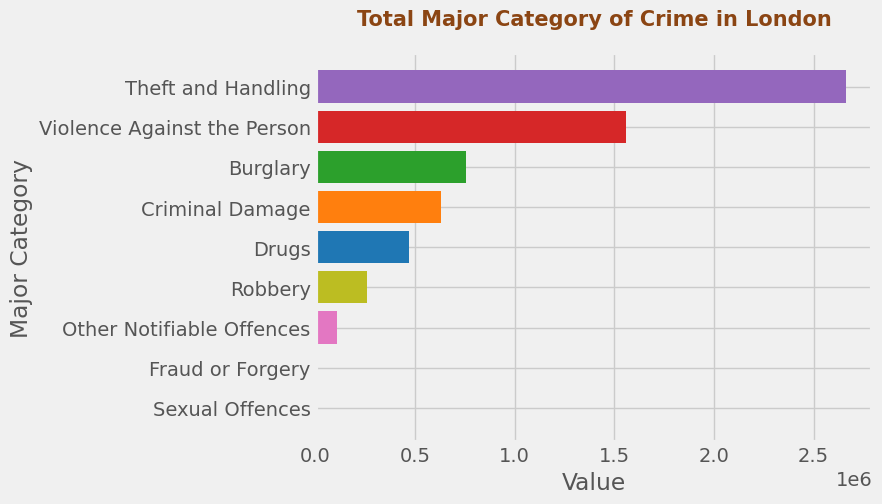

In [215]:

df_major.sort_values(by='value', ascending=True, inplace=True)

fig, ax = plt.subplots()

category = df_major.index
counts = df_major['value']
bar_colors = ['tab:gray', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
font1 = {'color':  'saddlebrown',
        'weight': 'bold',
        'size': 15}

ax.barh(category, counts, color = bar_colors)
ax.set_title('Total Major Category of Crime in London', y=1.05, fontdict=font1)
ax.set_ylabel('Major Category')
ax.set_xlabel('Value')

plt.show()

Berdasarkan area dan bar plot diatas, dapat diketahui bahwa 
- Kategorisasi kejahatan tingkat tinggi yang paling banyak di London adalah Theft and Handling
- Kategorisasi kejahatan tingkat tinggi kedua paling banyak di London adalah Violence Against the Person
- Kategorisasi kejahatan tingkat tinggi kedua paling rendah di London adalah Sexual Offences	

### Number of Theft and Handling in 2016

In [168]:
df_major1 = london_crime_data.groupby(['major_category','year', 'month']).agg({'value' : 'sum'})

TheftnHandling_2016 = df_major1.loc['Theft and Handling', 2016]
TheftnHandling_2016


,value
month,
1,22316
2,22028
3,23117
4,23149
5,25374
6,24722
7,25837
8,25176
9,24999


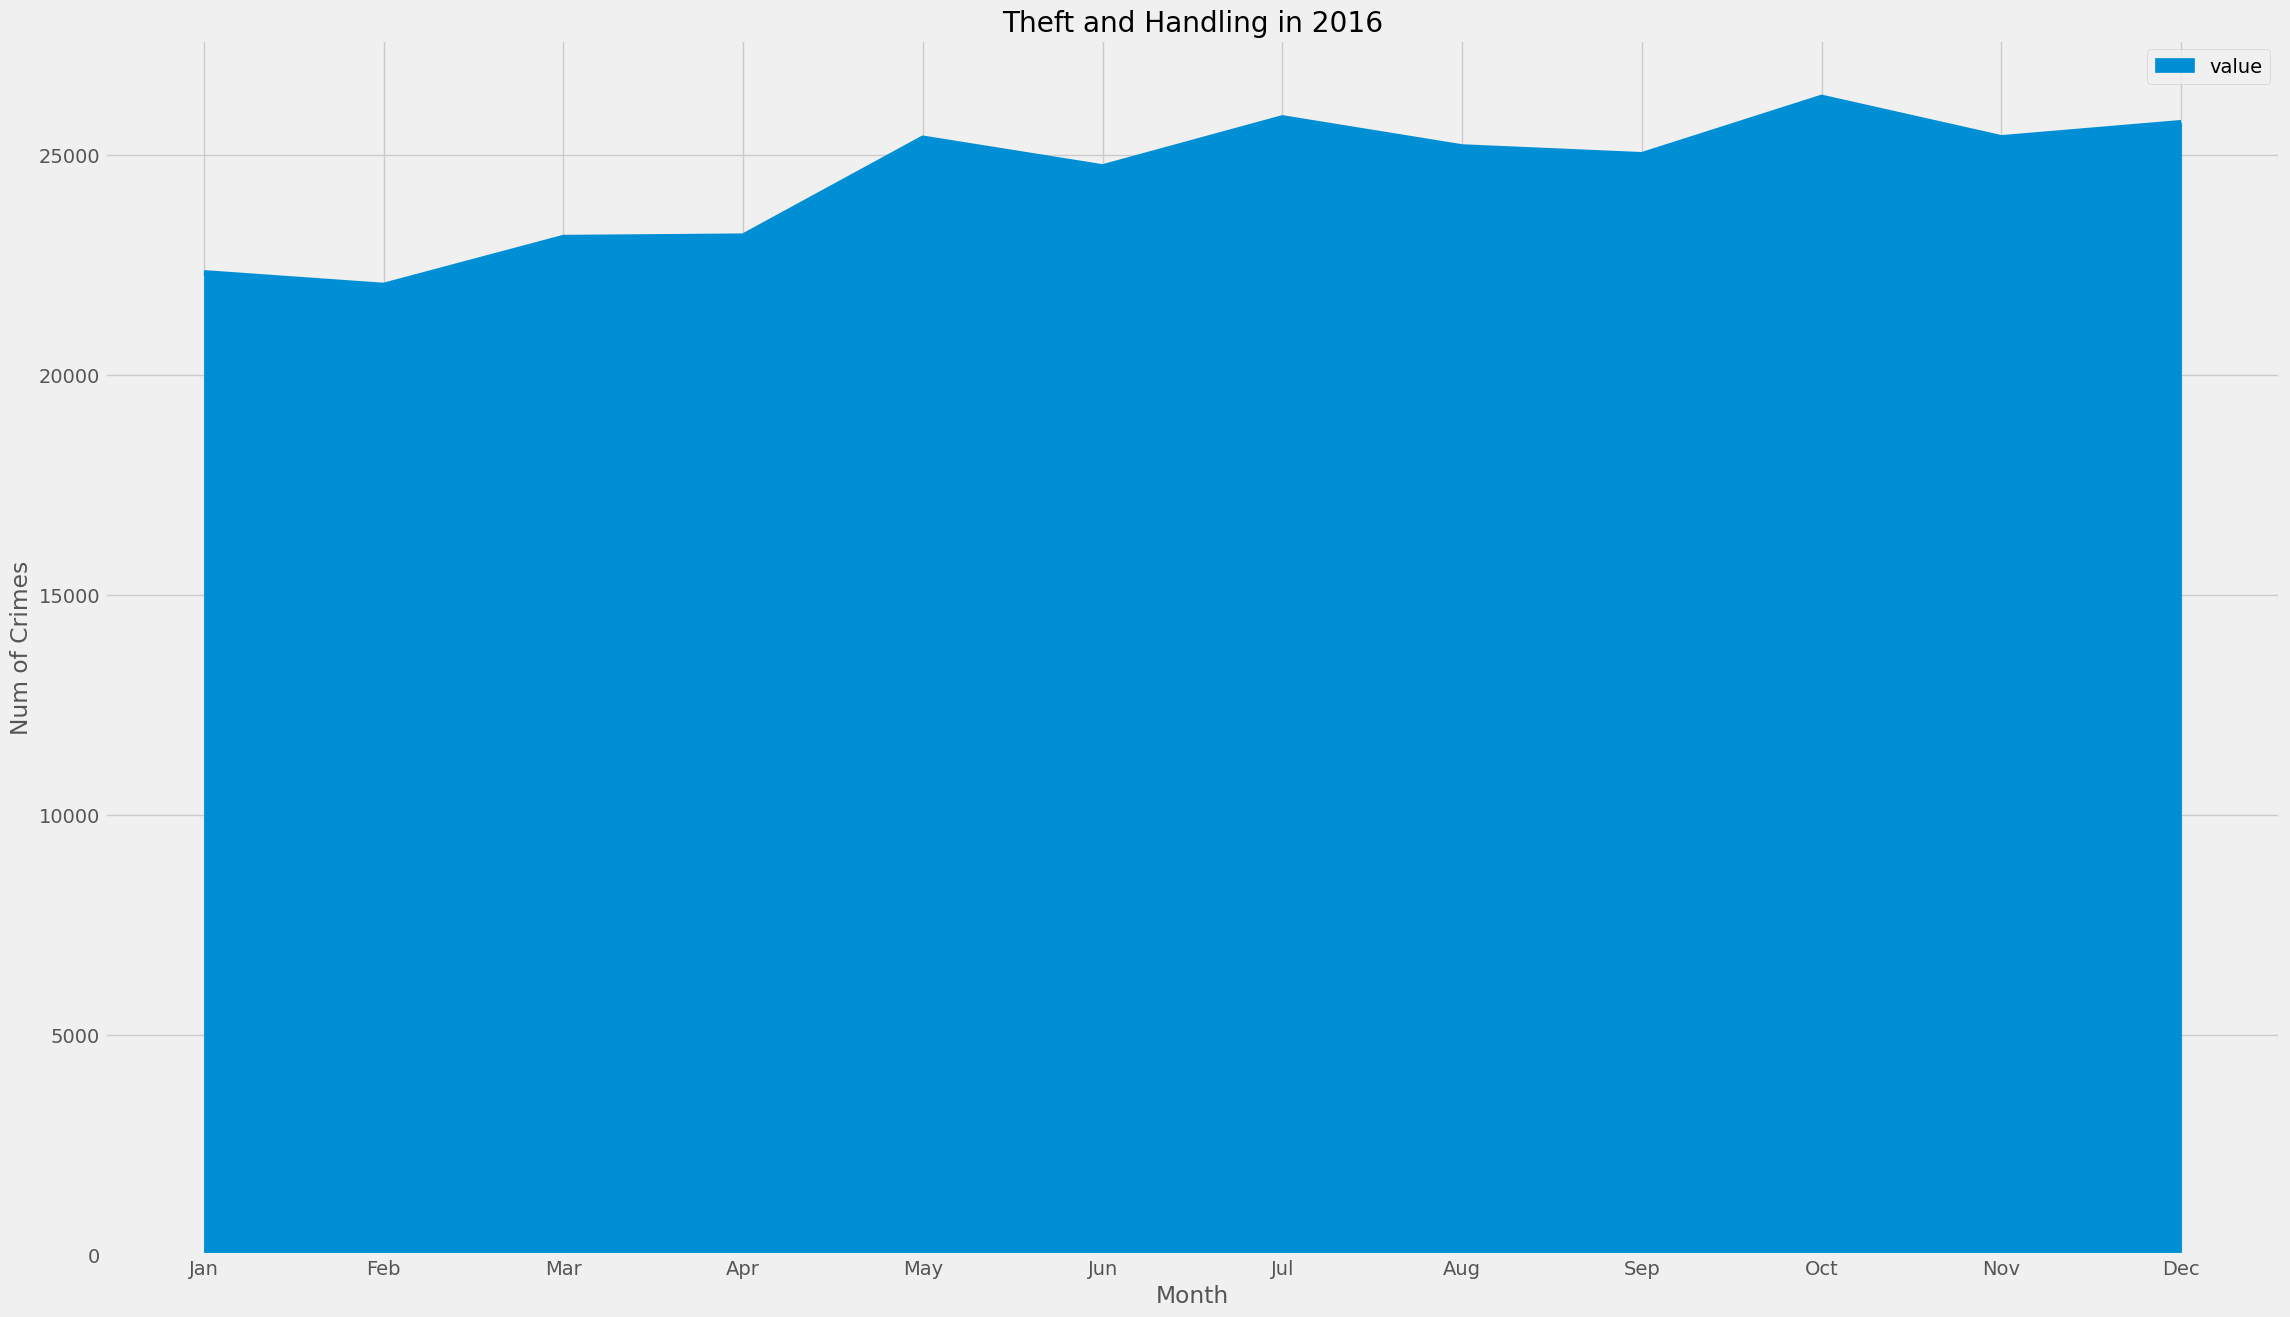

In [166]:
months = range(1, 13)
name_of_months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

TheftnHandling_2016.plot(kind='area', stacked=True, figsize=(25,15))

plt.title('Theft and Handling in 2016')
plt.ylabel('Num of Crimes')
plt.xlabel('Month')
plt.xticks(months, name_of_months )

plt.show()

Berdasarkan area plot diatas, dapat diketahui bahwa 
- Pada tahun 2016 jumlah Theft and Handling paling banyak berada di bulan Oktober
- ada tahun 2016 jumlah Theft and Handling paling sedikit berada di bulan Februari 

### Top 3 Major Category of Crimes in London (2011-2016)

In [68]:
df_major2 = london_crime_data.groupby(['major_category','year']).agg({'value' : 'sum'})
df_major2.sort_values(by='value', ascending=False, axis=0, inplace=True)
df_major2.head(20)



value
major_category              year        
Theft and Handling          2012  334054
                            2011  309292
                            2013  306372
                            2016  294133
                            2010  290924
                            2015  284022
                            2008  283692
                            2014  279880
                            2009  279492
Violence Against the Person 2016  232381
                            2015  218740
                            2014  185349
                            2009  160777
                            2008  159844
                            2010  157894
                            2012  150014
                            2011  146901
                            2013  146181
Burglary                    2012   93392
                            2011   93315

- #### Bar Plot

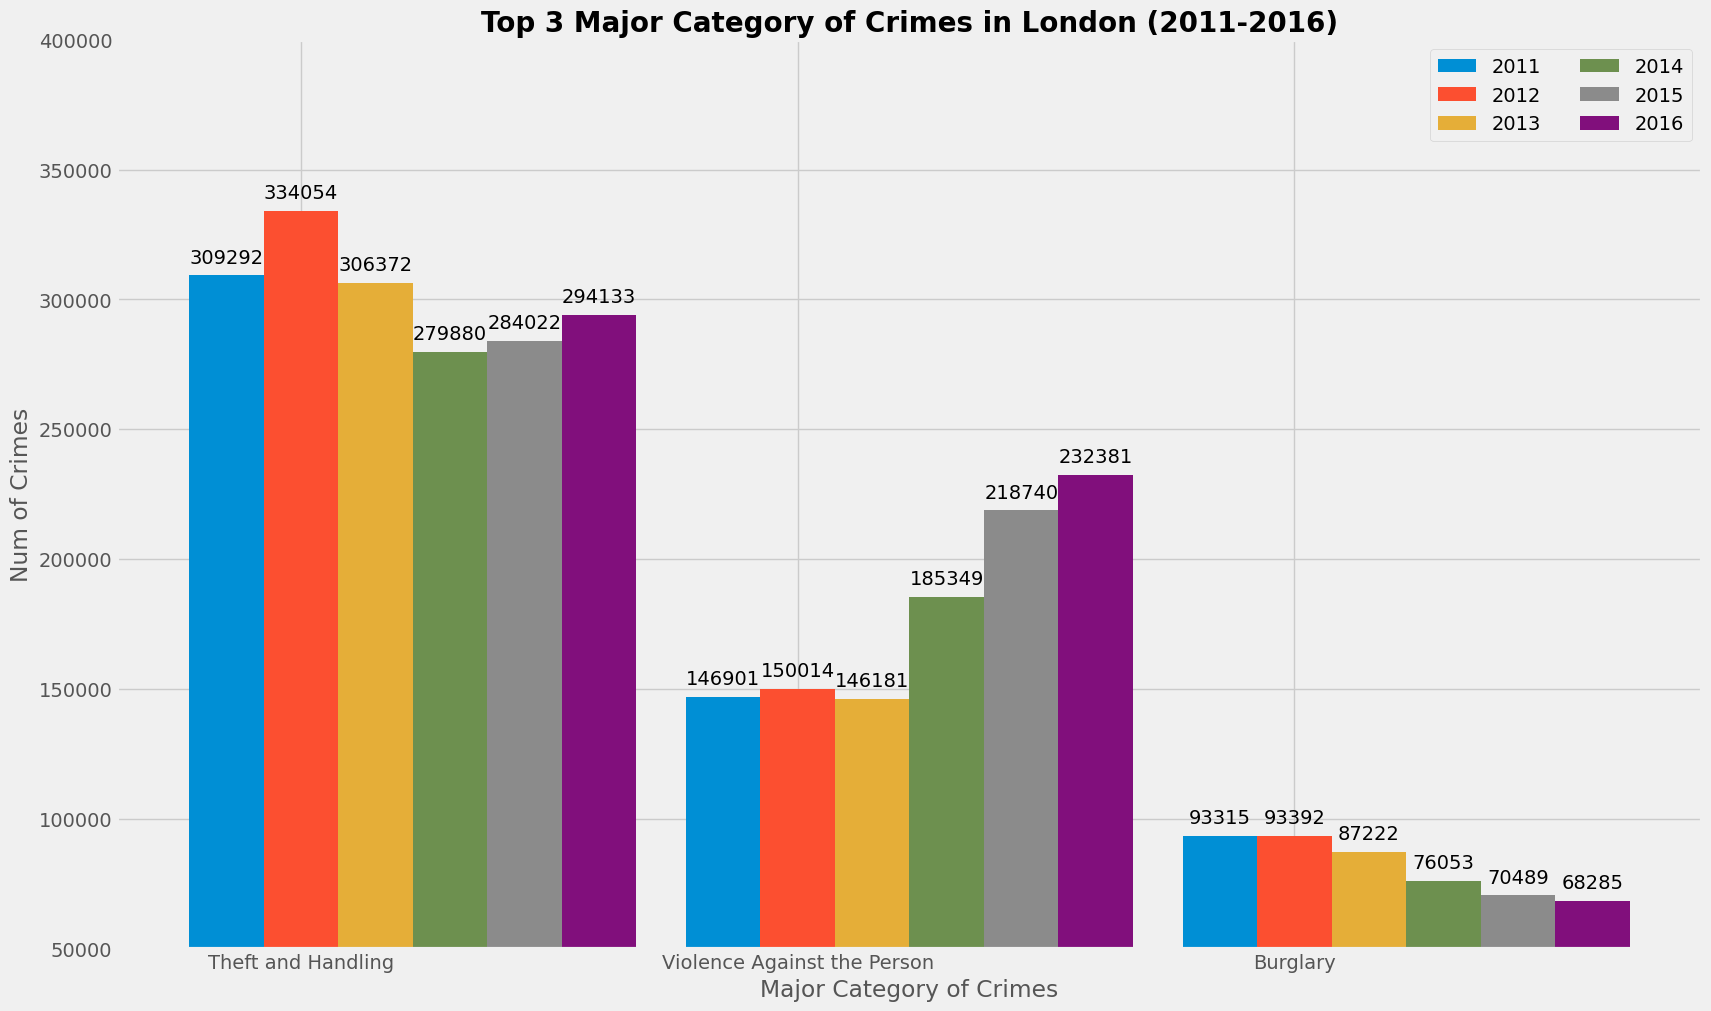

In [69]:
category = ['Theft and Handling', 'Violence Against the Person', 'Burglary']
years = {
    2011 : (309292, 146901, 93315),
    2012 : (334054, 150014, 93392),
    2013 : (306372, 146181, 87222),
    2014 : (279880, 185349, 76053),
    2015 : (284022, 218740, 70489),
    2016 : (294133, 232381, 68285),
}
x = np.arange(len(category))
width= 0.15
multiplier = 0

fig, ax = plt.subplots(layout = 'constrained', figsize = (17,10))

for attribute, measurement in years.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=6)
    multiplier += 1

font2 = {'color':  'black',
        'weight': 'bold',
        'size': 20}
ax.set_ylabel('Num of Crimes')
ax.set_xlabel('Major Category of Crimes')
ax.set_title('Top 3 Major Category of Crimes in London (2011-2016)', fontdict=font2)
ax.set_xticks(x + width, category)
ax.legend(loc='upper right', ncols=2)
ax.set_ylim(50000, 400000)


plt.show()


Berdasarkan bar plot di atas, dapat diketahui bahwa
- Dari tahun 2011-2016, jumlah kejahatan dengan tipe Theft and Handling yang tertinggi terdapat pada tahun 2012 dan terendah pada tahun 2014
- Dari tahun 2011-2016, jumlah kejahatan dengan tipe Violence Against the Person yang tertinggi terdapat pada tahun 2016 dan terendah pada tahun 2013
- Dari tahun 2011-2016, jumlah kejahatan dengan tipe Burglary yang tertinggi terdapat pada tahun 2012 dan terendah pada tahun 2016

## Low Level Categorization of Crime within Major Category

### Number of Minor Category of Crimes 

In [77]:
london_crime_data.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


In [290]:
df_minor = london_crime_data.groupby('minor_category').sum()[['value']]
df_minor



/var/folders/xy/xy312wfd7rl3ln2c6qntrhdr0000gn/T/ipykernel_16836/1000835412.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_minor = london_crime_data.groupby('minor_category').sum()[['value']]


,value
minor_category,
Assault with Injury,451001
Burglary in Other Buildings,263011
Burglary in a Dwelling,491282
Business Property,21295
Common Assault,413690
Counted per Victim,3840
Criminal Damage To Dwelling,154116
Criminal Damage To Motor Vehicle,265463
Criminal Damage To Other Building,66003


- ### Histogram

Text(0.5, 0, 'Number of Crimes')

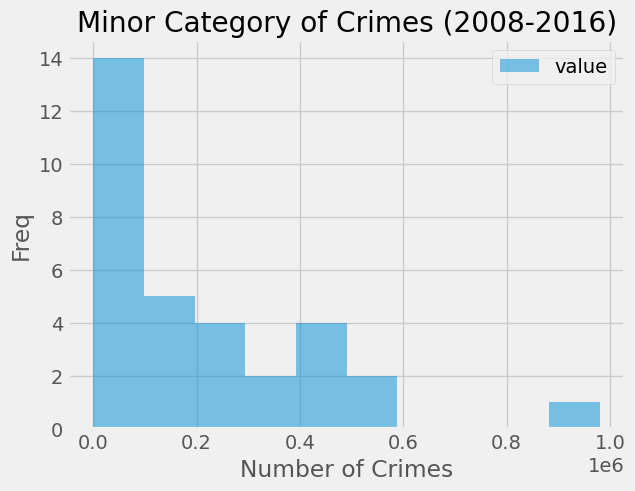

In [293]:
ax = df_minor.plot(
    kind='hist', 
    alpha=0.5,
    bins=10)

ax.set_title("Minor Category of Crimes (2008-2016)")
ax.set_ylabel('Freq')
ax.set_xlabel('Number of Crimes')

Berdasarkan histogram di atas, dapat diketahui bahwa 
- Terdapat 14 tipe kejahatan dalam minor category yang berkontribusi menyumbangkan angka kejahatan antara 0 sampai 100000
- Terdapat 5 tipe kejahatan dalam minor category yang berkontribusi menyumbangkan angka kejahatan antara 100000 sampai 200000
- Terdapat 4 tipe kejahatan dalam minor category yang berkontribusi menyumbangkan angka kejahatan antara 200000 sampai 300000
- Terdapat 2 tipe kejahatan dalam minor category yang berkontribusi menyumbangkan angka kejahatan antara 300000 sampai 400000
- Terdapat 4 tipe kejahatan dalam minor category yang berkontribusi menyumbangkan angka kejahatan antara 400000 sampai 500000
- Terdapat 2 tipe kejahatan dalam minor category yang berkontribusi menyumbangkan angka kejahatan antara 500000 sampai 600000
- Tidak ada tipe kejahatan dalam minor category yang berkontribusi menyumbangkan angka kejahatan antara 600000 sampai 800000
- Terdapat 1 tipe kejahatan dalam minor category yang berkontribusi menyumbangkan angka kejahatan antara 900000 sampai 1000000

### Top 5 Minor Category of Crimes in London (2014-2016)

In [296]:
df_minor.sort_values(by='value', ascending=False, inplace=True)
df_minor

,value
minor_category,
Other Theft,980085
Theft From Motor Vehicle,569956
Burglary in a Dwelling,491282
Harassment,458124
Assault with Injury,451001
Possession Of Drugs,431948
Common Assault,413690
Theft From Shops,345142
Other Theft Person,308842


In [300]:
year_2014 = pd.Series([108577,52167,48975, 55330,45677], index=('Other Theft', 'Theft From Motor Vehicle', 'Burglary in a Dwelling','Harassment', 'Assault with Injury'))
year_2015 = pd.Series([107571, 50024, 44656, 71633, 48164], index=('Other Theft', 'Theft From Motor Vehicle', 'Burglary in a Dwelling','Harassment', 'Assault with Injury'))
year_2016 = pd.Series([103807, 51319, 42996, 78676, 50038], index=('Other Theft', 'Theft From Motor Vehicle', 'Burglary in a Dwelling','Harassment', 'Assault with Injury'))

df_minor1 = pd.DataFrame({
    '2014' : year_2014,
    '2015' : year_2015,
    '2016': year_2016,
})
df_minor1

,2014,2015,2016
Other Theft,108577,107571,103807
Theft From Motor Vehicle,52167,50024,51319
Burglary in a Dwelling,48975,44656,42996
Harassment,55330,71633,78676
Assault with Injury,45677,48164,50038


- ### Box Plot

In [301]:
df_minor1.describe()

,2014,2015,2016
count,5.000000,5.000000,5.000000
mean,62145.200000,64409.600000,65367.200000
std,26203.908376,26344.608923,25433.979569
min,45677.000000,44656.000000,42996.000000
25%,48975.000000,48164.000000,50038.000000
50%,52167.000000,50024.000000,51319.000000
75%,55330.000000,71633.000000,78676.000000
max,108577.000000,107571.000000,103807.000000


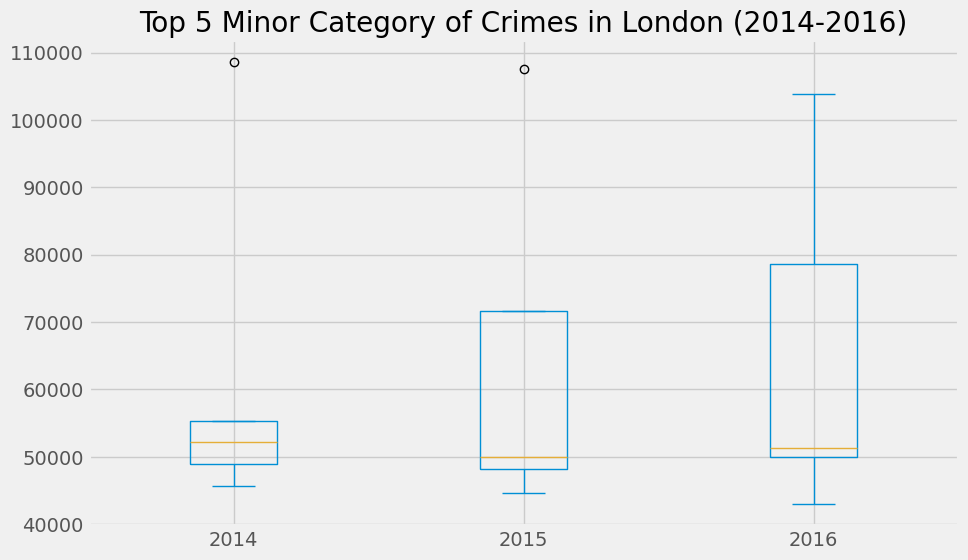

In [303]:
df_minor1.plot(kind='box', figsize=(10,6))
plt.title('Top 5 Minor Category of Crimes in London (2014-2016)')
plt.show()

Berdasarkan box plot di atas, dapat diketahui bahwa
1. Tahun 2014
    - Q1 = 48975
    - Q3 = 55330
    - IQR = Q3-Q1 = 6355
    - Outlier > 55330 + (1.5 * 6355) = 64862.5
    - Other Theft merupakan outlier karena memiiki angka kejahatan yang lebih dari 64862.5
2. Tahun 2015
    - Q1 = 48164
    - Q3 = 71633
    - IQR = Q3-Q1 = 23469
    - Outlier > 71633 + (1.5 * 23469) = 106836.5
    - Other Theft merupakan outlier karena memiiki angka kejahatan yang lebih dari 106836.5
3. Tahun 2016
    - Q1 = 50038
    - Q3 = 78676
    - IQR = 28641
    - Outlier > 78676 + (1.5 * 28641) = 121637.5
    - Tidak ada outlier

## Number of Crimes in London's Boroughs

### Percentage of Crimes in Boroughs

In [81]:
borough_data = london_crime_data.groupby('borough').sum()
borough_data.sort_values(by='value', ascending=False, inplace=True)
borough_data

/var/folders/xy/xy312wfd7rl3ln2c6qntrhdr0000gn/T/ipykernel_16836/165111260.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  borough_data = london_crime_data.groupby('borough').sum()


,value,year,month
borough,,,
Westminster,455028,737719920,2383290
Lambeth,292178,1044324576,3373812
Southwark,278809,972399600,3141450
Camden,275147,761405184,2459808
Newham,262024,948497040,3064230
Croydon,260294,1211425200,3913650
Ealing,251562,1105384752,3571074
Islington,230286,722726496,2334852
Tower Hamlets,228613,829201536,2678832


- #### Pie Chart

In [82]:
borough_top10 = borough_data['value'].head(10)
borough_top10

borough
Westminster      455028
Lambeth          292178
Southwark        278809
Camden           275147
Newham           262024
Croydon          260294
Ealing           251562
Islington        230286
Tower Hamlets    228613
Brent            227551
Name: value, dtype: int64

Text(0.5, 1.15, "Percentage of Crimes in Top 10 London's Boroughs")

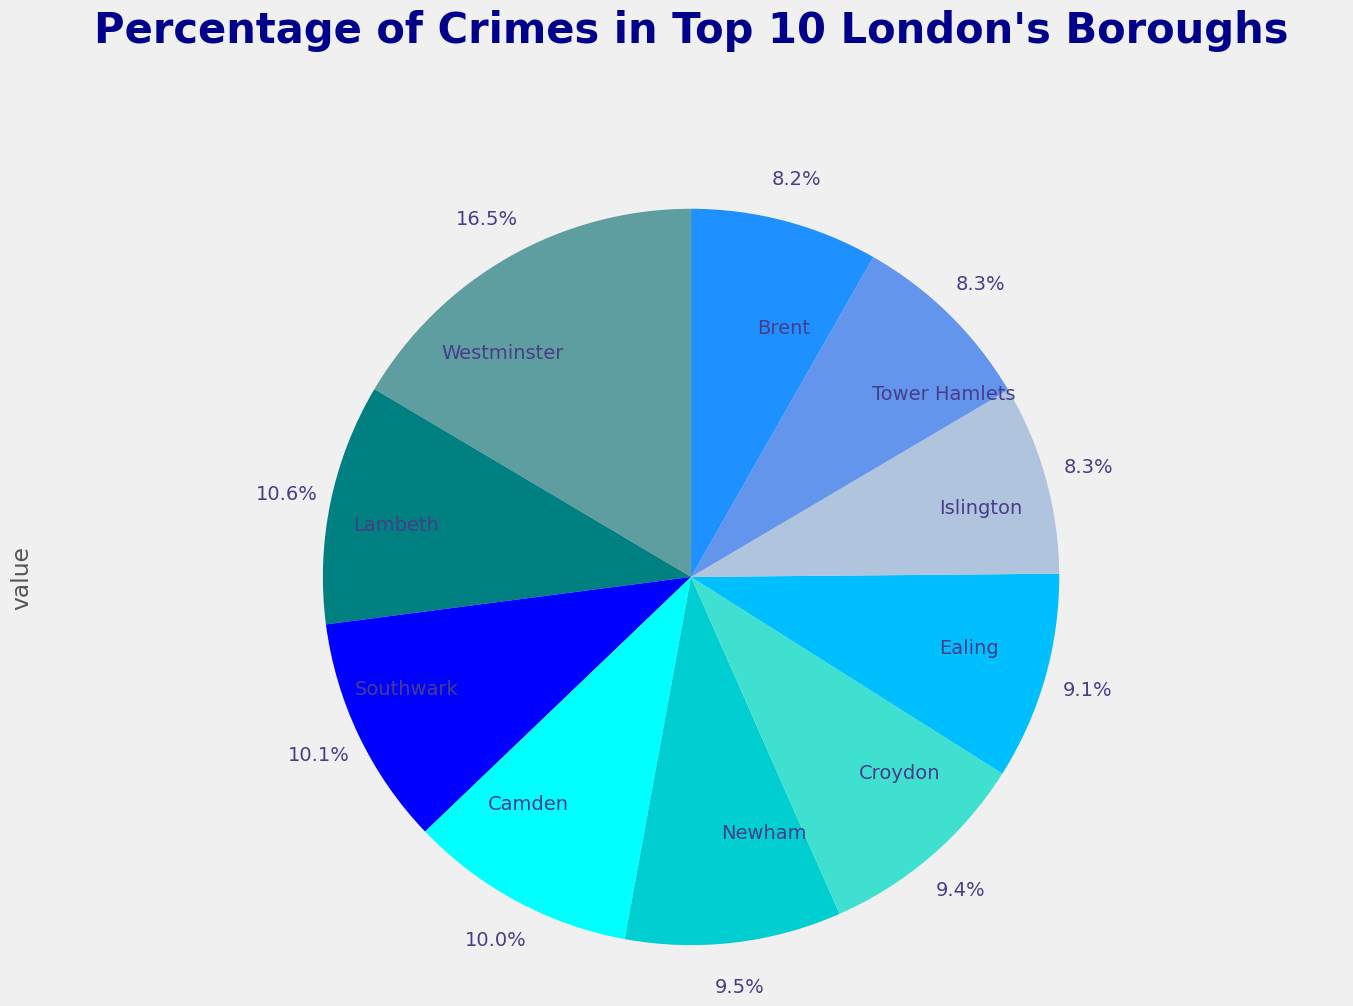

In [278]:
font1 = {'color':  'darkblue',
        'weight': 'bold',
        'size': 30,
        }
lable=borough_top10.index
ax = plt.axes()
ax.set_facecolor("lightblue")
borough_top10.plot(
    kind='pie',
    figsize=(15,10),
    autopct='%1.1f%%', 
    startangle=90, 
    shadow=False,
    pctdistance=1.12,
    labels = lable,
    labeldistance = 0.7,
    colors = ['cadetblue', 'teal', 'blue', 'cyan', 'darkturquoise','turquoise', 'deepskyblue','lightsteelblue','cornflowerblue','dodgerblue'],
    textprops={'fontsize': 14,'color':'darkslateblue'})

plt.axis('equal')
plt.title("Percentage of Crimes in Top 10 London's Boroughs", y=1.15, fontdict=font1)


Berdasarkan pie chart di atas, dapat diketahui:
- Westminster merupakan borough dengan total kejahatan tertinggi

### Top 3 Boroughs with Highest Number of Crimes in London (2008-2016)

In [281]:
df_borough= london_crime_data.groupby(['borough','year']).agg({'value' : 'sum'})
df_borough.sort_values(by='value', ascending=False, inplace=True)
df_borough.loc['Southwark']


,value
year,
2008,33470
2016,31636
2010,31320
2013,31128
2012,30737
2011,30723
2009,30623
2015,30260
2014,28912


- ### Area Plot

In [123]:
Westminster = pd.Series([47846, 48456, 48116, 54243, 59226, 53852,  47564, 47395, 48330], index=range(2008,2017))
Lambeth = pd.Series([31717, 31225, 31671, 33224, 33473, 31868, 31765, 33164, 34071], index=range(2008,2017))
Southwark = pd.Series([33470, 30623, 31320, 30723, 30737, 31128, 28912, 30260, 31636], index=range(2008,2017))

borough_top3 = pd.DataFrame({
    'Westminster' : Westminster,
    'Lambeth': Lambeth,
    'Southwark': Southwark,
})
borough_top3

,Westminster,Lambeth,Southwark
2008,47846,31717,33470
2009,48456,31225,30623
2010,48116,31671,31320
2011,54243,33224,30723
2012,59226,33473,30737
2013,53852,31868,31128
2014,47564,31765,28912
2015,47395,33164,30260
2016,48330,34071,31636


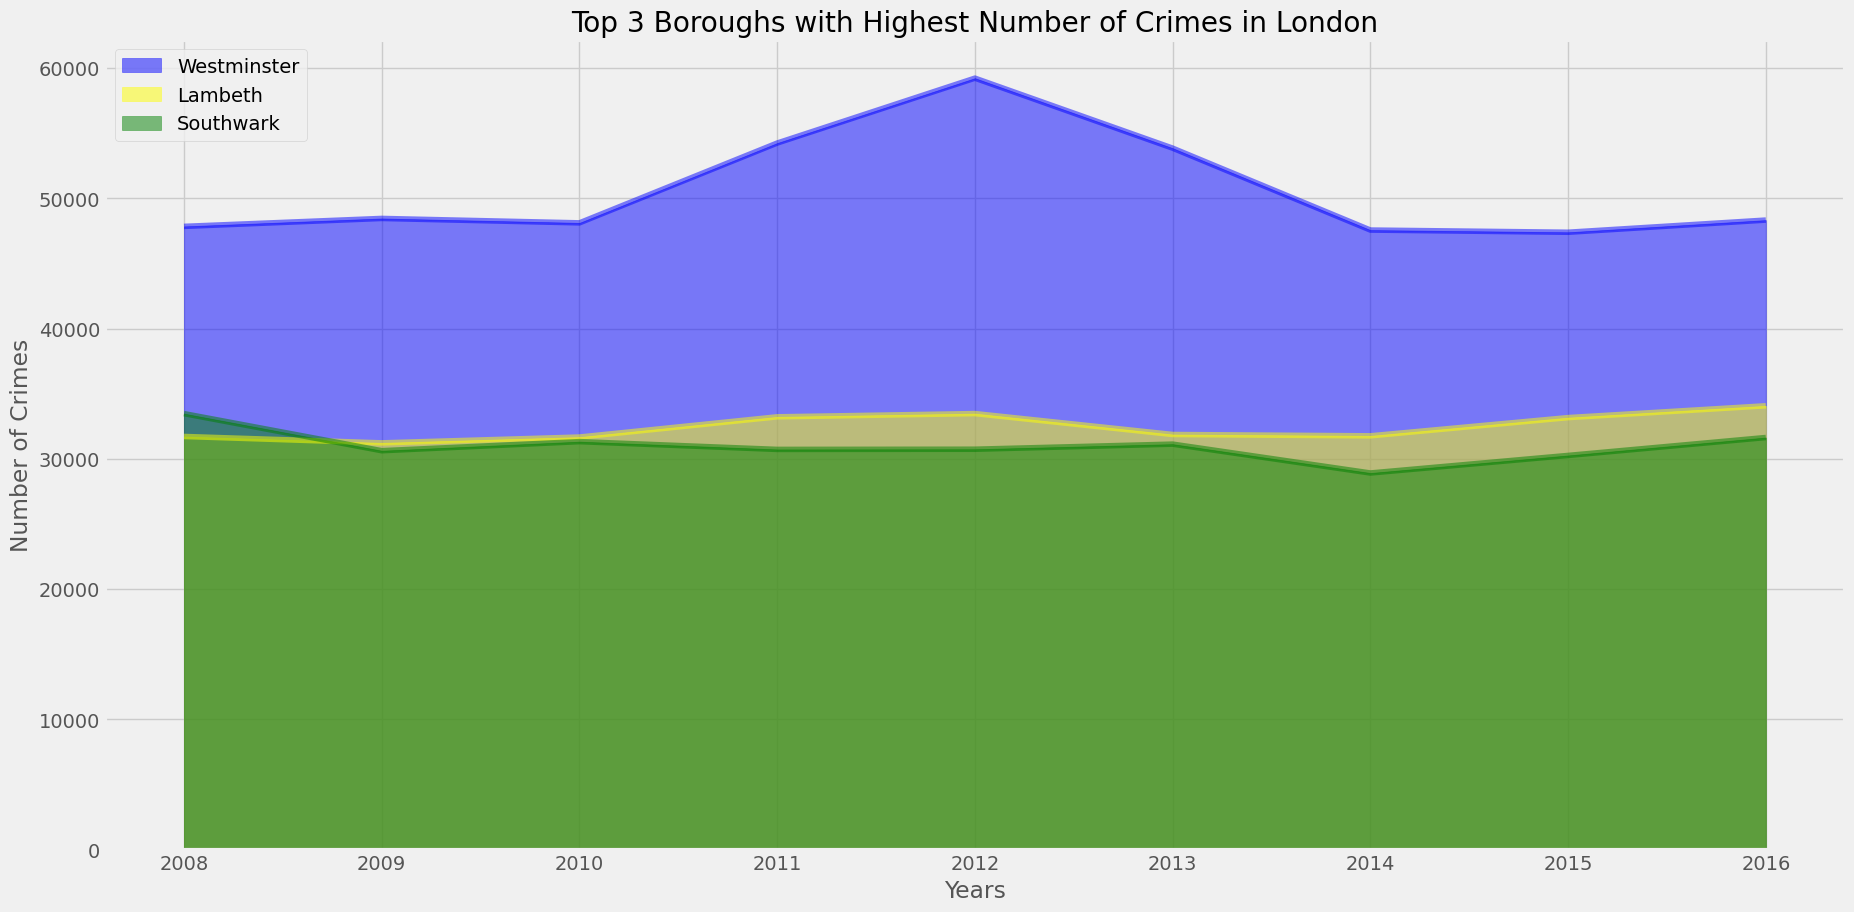

In [280]:
borough_top3.plot(kind='area', stacked=False, alpha=.5, figsize=(20,10), color=['blue', 'yellow', 'green'])
plt.title('Top 3 Boroughs with Highest Number of Crimes in London')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')
plt.legend(loc='upper left')

plt.show()

Berdasarkan area plot di atas, dapat diketahui
- Borough dengan total kejahatan tertinggi, yaitu Westminster memiliki total kejahatan tertinggi pada tahun 2012, lonjakan angka kejahatan dari tahun 2011, dan penurunan angka kejahatan dari tahun 2013
- Borough dengan total kejahatan kedua tertinggi, yaitu Lambeth memiliki total kejahatan tertinggi pada tahun 2016
- Borough dengan total kejahatan kedua tertinggi, yaitu Southwark memiliki total kejahatan tertinggi pada tahun 2008
- Lambeth dan Southwark memiliki tren angka kejahatan yang mirip pada tahun 2008-2010 dan tahun 2014-2016

- #### Word Cloud

In [ ]:
borough_data

,value,year,month
borough,,,
Barking and Dagenham,149447,625812480,2021760
Barnet,212191,1152537984,3723408
Bexley,114136,775964016,2506842
Brent,227551,987175728,3189186
Bromley,184349,1054102896,3405402
Camden,275147,761405184,2459808
City of London,780,19556640,63180
Croydon,260294,1211425200,3913650
Ealing,251562,1105384752,3571074


In [ ]:
# Total kejahatan di London dari tahun 2008-2016
total_crimes= borough_data['value'].sum()
total_crimes

6447758

In [ ]:
max_words = 50
word_string = ''
for borough in borough_data.index.values:
    if len (borough.split(' ')) == 1:
        repeat_num_times = int(borough_data.loc[borough,'value']/float(total_crimes)*max_words)
        word_string = word_string + ((borough + ' ')* repeat_num_times)
word_string

'Barnet Brent Bromley Camden Camden Croydon Croydon Ealing Enfield Greenwich Hackney Haringey Havering Hillingdon Hounslow Islington Lambeth Lambeth Lewisham Newham Newham Redbridge Southwark Southwark Wandsworth Westminster Westminster Westminster '

(-0.5, 399.5, 199.5, -0.5)

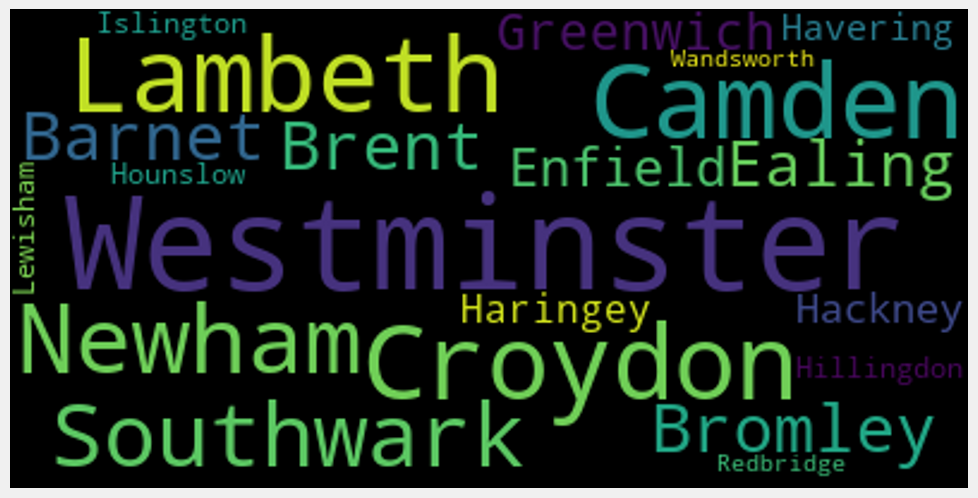

In [ ]:
wodcloud = WordCloud(background_color='black').generate(word_string)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(12)
plt.imshow(wodcloud, interpolation='catrom')
plt.axis('off')

Berdasarkan word cloud di atas, dapat diketahui bahwa mayoritas tindakan kejahatan di London terjadi di salah satu dari 21 borough, yaitu di Westminister

- #### Folium

In [ ]:
latitude = 51.509865
longitude= -0.118092
london_map = folium.Map(location=[latitude, longitude], zoom_start=12)
london_map

- #### Choropleth

In [ ]:
!wget --quiet https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson

In [ ]:
world_geo = r'london_boroughs.geojson'
world_map= folium.Map(location=[54.237933,-2.36967],zoom_start=5, tiles='Stamen Terrain')

world_map.choropleth(
    geo_data = world_geo,
    data = london_crime_data[['borough', 'value']],
    columns=['borough', 'value'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime rate in boroughs of london'

)
world_map

/Users/apple/Library/Python/3.8/lib/python/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## Conclusions

- Total angka kejahatan dari tahun 2008-2016 bersifat fluktuatif. Namun, dari mulai tahun 2015 mengalami kenaikan
- Theft and Handling merupakan kejahatan tingkat tinggi yang paling sering terjadi di London, sedangkan Sexual Offences yang paling jarang terjadi di London
- Other Theft merupakan kategori kejahatan tingkat rendah dalam kategori kejahatan tinggi yang paling sering terjadi di London, sedangkan Rape yang paling jarang terjadi 
- Westminster adalah wilayah di London yang memiliki tingkat kejahatan tertinggi, sehingga wilayah ini dapat dikatakan sebagai wilayah yag paling berbaya. Sedangkan, City of London adalah wilayah yang paling aman dengan jumlah angka kejahatan terendah di London
